# Air pressure system failures in Scania trucks

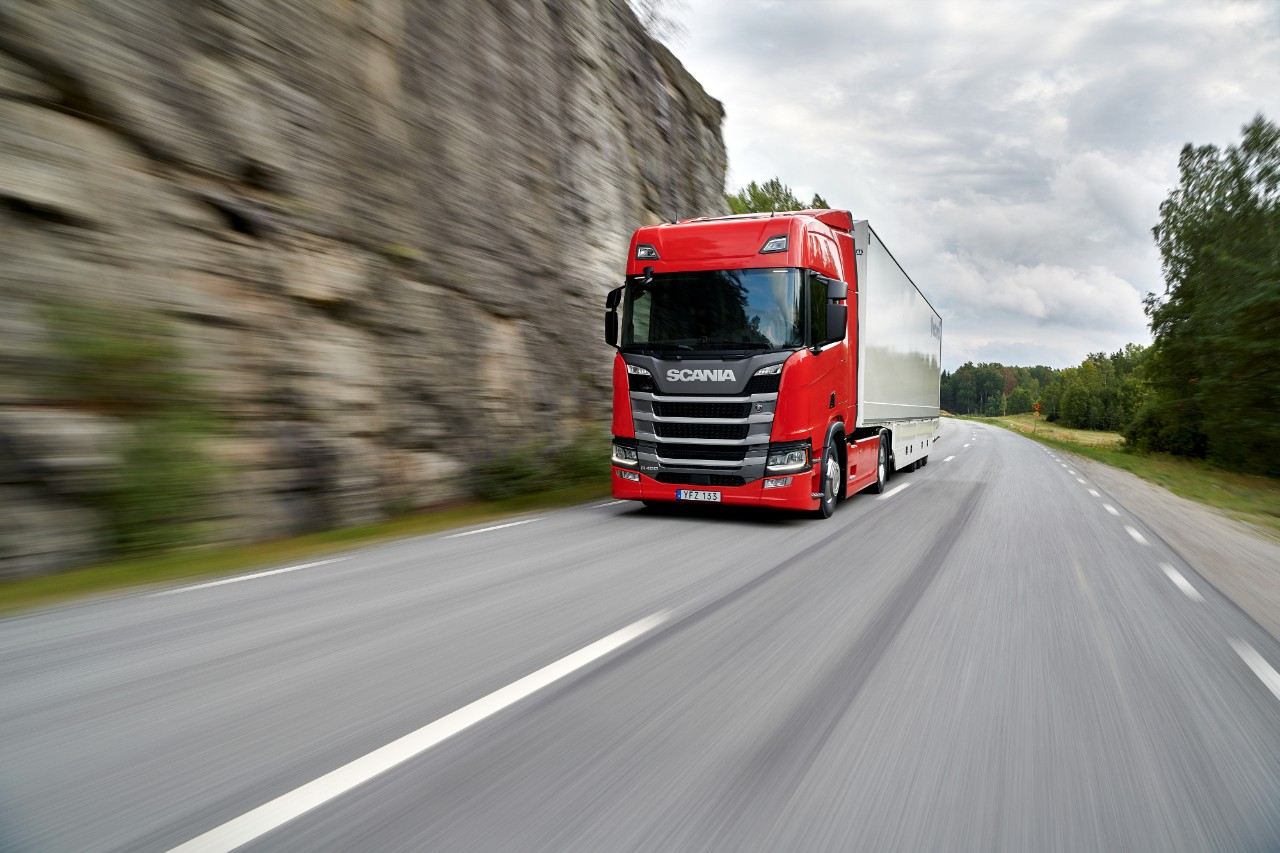

# Given data about air pressure systems in trucks, let's try to predict whether a given system will be fail or not

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
# preprocessing
from sklearn.impute import SimpleImputer

# Importing Dataset

In [2]:
#Data Ingestion 
data_train=pd.read_csv(r'I:\ML\aps_failure_training_set.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data_test=pd.read_csv(r'I:\ML\aps_failure_test_set.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Exploration and Visualization for both Train and the Test file

In [4]:
rows,columns=data_train.shape
print(f"Number of Observations in train dataset:Rows->{rows} Columns->{columns}")

Number of Observations in train dataset:Rows->60000 Columns->171


In [5]:
rows,columns=data_test.shape
print(f"Number of Observations in test dataset:Rows->{rows} Columns->{columns}")

Number of Observations in test dataset:Rows->16000 Columns->171


In [6]:
data_train.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

  ag_003 ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0      0  37250  1432864  3664156  1007684  25896      0  2551696      0   
1      0  18254   653294  1720800   516724  31642      0  1393352      0   
2      0   1648   370592  1883374   292936  12016      0  1234132      0   
3    318   2212     3232     1872        0      0      0     2668      0   
4      0  43752  1966618  1800340   131646   4588      0  1974038      0   

  aj_000 ak_000 al_000  am_0   an_000   ao_000   ap_000   aq_000 ar_000  \
0      0      0      0     0  4933296  3655166  1766008  1132040      0   
1     68      0      0     0  2560898  2127150  1084598   338544      0   
2      0      0      0     0  2371990  2173634   300796   153698      0   
3      0      0    642  3894    10184     7554    10764     1014      0   
4    226      0      0     0  3230626  2618878  1058136   551022      0   

  as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
0      0      0      0   1012    268      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0    358    110      0      0      0      0      0   
3      0      0      0     60      6      0      0      0      0      0   
4      0      0      0   1788    642      0      0      0      0  42124   

   ay_005   ay_006   ay_007   ay_008 ay_009 az_000 az_001 az_002 az_003  \
0  469014  4239660   703300   755876      0   5374   2108   4114  12348   
1   71510   772720  1996924    99560      0   7336   7808  13776  13086   
2       0   870456   239798  1450312      0   1620   1156   1228  34250   
3       0        0     2038     5596      0     64      6      6    914   
4  372236  2128914   819596   584074      0   1644    362    562    842   

    az_004   az_005 az_006 az_007 az_008 az_009   ba_000   ba_001  ba_002  \
0   615248  5526276   2378      4      0      0  2328746  1022304  415432   
1  1010074  1873902  14726      6      0      0  1378576   447166  199512   
2  1811606   710672     34      0      0      0   790690   672026  332340   
3       76     2478   2398   1692      0      0     6176      340     304   
4    30194  3911734   1606      0      0      0  1348578  1035668  338762   

   ba_003  ba_004  ba_005   ba_006  ba_007 ba_008 ba_009   bb_000 bc_000  \
0  287230  310246  681504  1118814    3574      0      0  6700214      0   
1  154298  137280  138668   165908  229652  87082   4708  3646660     86   
2  254892  189596  135758   103552   81666     46      0  2673338    128   
3     102      74     406      216      16      0      0    21614      2   
4  236540  182278  151778   163248  470800  19292      0  4289260    448   

  bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  \
0     10    108     50  2551696  97518  947550  799478  330760  353400   
1    454    364    350  1393352  49028  688314  392208  341420  359780   
2    202    576      4  1234132  28804  160176  139730  137160  130640   
3     12      0      0     2668    184    7632    3090      na      na   
4    556    642      2  1974038  86454  653692  399410  306780  282560   

   bm_000  bn_000  bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000  \
0  299160  305200  283680     na     na     na  178540  76698.08  6700214   
1  366560      na      na     na     na     na    6700  33057.51  3646660   
2      na      na      na     na     na     na   28000  41040.08  2673338   
3      na      na      na     na     n

In [7]:
data_test.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0     20     12      0      0      0      0      0   
1   neg      82      0     68     40      0      0      0      0      0   
2   neg   66002      2    212    112      0      0      0      0      0   
3   neg   59816     na   1010    936      0      0      0      0      0   
4   neg    1814     na    156    140      0      0      0      0      0   

   ag_003   ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0    2682     4736     3862     1846        0      0      0     3976      0   
1       0      748    12594     3636        0      0      0     5244      0   
2  199486  1358536  1952422   452706    25130    520      0  1891670      0   
3       0   123922   984314  1680050  1135268  92606  14038  1772828      0   
4       0       72    17926    82834     3114      0      0    48978      0   

  aj_000 ak_000 al_000    am_0   an_000   ao_000  ap_000  aq_000 ar_000  \
0      0      0   1520    2374    11516     9480  111258     470      0   
1     60      0      0       0    23174    18166   23686    1270      0   
2      0      0  77898  110548  3605894  3291610  959756  286536      0   
3      0      0   1116    2372  3546760  3053176  652616  423374      0   
4      0      0      0       0    97146    89920   12932    5092      0   

  as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
0      0      0      0     58     26      0      0      0      0      0   
1      0      0      0     12     82      0      0      0      0      0   
2      0      0      0    106    340      0      0      0      0      0   
3      0   7274      0   1622    432      0      0      0      0      0   
4      0      0      0    102     50      0      0      0      0      0   

  ay_005   ay_006   ay_007  ay_008 ay_009 az_000 az_001 az_002  az_003  \
0      0        0        0   13124      2   1956    434     76     174   
1      0        0      692   16286      0    280     44     50    1274   
2  24286   681260  2808472  474782      0  22984    894   1162    1304   
3   6388  1091104  2930694    2012      0   3526    904   1426  223226   
4  11544    73570     3662   15170      0    126     34     60      58   

    az_004   az_005   az_006  az_007 az_008 az_009   ba_000  ba_001  ba_002  \
0      190     6198     1148    2948      2      0     8762    2566     480   
1      866     3362    11102       0      0      0    12564    1756     638   
2     1856   388700  3424812  123828  23260      0  1662580  667960  387998   
3  2663348  1137664      104       0      0      0  1283806  928212  345132   
4    10768    92898        2       0      0      0    53558   34620    9824   

   ba_003  ba_004  ba_005  ba_006  ba_007  ba_008  ba_009   bb_000 bc_000  \
0     380     196     516      86      66      74       0   124340      4   
1     276     172     132     812     308     192     128    46894      4   
2  226078  161558  148288  154908  220820  147744  210866  4644422    958   
3  265930  194770  158262  219942  620264   13880       0  4201350     98   
4    4552     764     294     192     142       0       0   110094      4   

  bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  \
0      6      4      0     3976    318  107662    3458      na      na   
1      2     38      0     5244    360   20520    3134      na      na   
2   7848   3624      0  1891670  47066  692800  265492  336240  194360   
3    238    880     16  1772828  51468  331744  316130  176000  208420   
4      4    986      0    48978   1100    7932    4966      na      na   

   bm_000 bn_000 bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000  \
0      na     na     na     na     na     na  110980     59.53   124340   
1      na     na     na     na     na     na   23320     81.89    46894   
2  245240     na     na     na     na     na  175480  66002.89  4644422   
3  159380     na     na     na     na     na  

In [8]:
def printinfo(data):
    temp = pd.DataFrame(index=data.columns)
    temp['data_type'] = data.dtypes
    temp['null_count'] = data.isnull().sum()
    temp['unique_count'] = data.nunique()
    temp['duplicate_count'] =data.duplicated().sum() 
    return temp

# Information of the Train file

In [9]:
printinfo(data_train)

data_type  null_count  unique_count  duplicate_count
class     object           0             2                0
aa_000     int64           0         22095                0
ab_000    object           0            30                0
ac_000    object           0          2062                0
ad_000    object           0          1887                0
ae_000    object           0           334                0
af_000    object           0           419                0
ag_000    object           0           155                0
ag_001    object           0           618                0
ag_002    object           0          2423                0
ag_003    object           0          7880                0
ag_004    object           0         23072                0
ag_005    object           0         40798                0
ag_006    object           0         40616                0
ag_007    object           0         32126                0
ag_008    object           0         18933                0
ag_009    object           0          5356                0
ah_000    object           0         43572                0
ai_000    object           0          4056                0
aj_000    object           0           895                0
ak_000    object           0           160                0
al_000    object           0          9018                0
am_0      object           0         10583                0
an_000    object           0         48205                0
ao_000    object           0         47724                0
ap_000    object           0         44673                0
aq_000    object           0         34922                0
ar_000    object           0            69                0
as_000    object           0            22                0
at_000    object           0          3512                0
au_000    object           0            57                0
av_000    object           0          3861                0
ax_000    object           0          2216                0
ay_000    object           0           467                0
ay_001    object           0           920                0
ay_002    object           0           987                0
ay_003    object           0          1033                0
ay_004    object           0          1768                0
ay_005    object           0         19697                0
ay_006    object           0         34629                0
ay_007    object           0         38652                0
ay_008    object           0         37823                0
ay_009    object           0           448                0
az_000    object           0          9185                0
az_001    object           0          7379                0
az_002    object           0          9065                0
az_003    object           0         21531                0
az_004    object           0         34078                0
az_005    object           0         44602                0
az_006    object           0         12307                0
az_007    object           0          3877                0
az_008    object           0          1272                0
az_009    object           0           337                0
ba_000    object           0         44841                0
ba_001    object           0         40165                0
ba_002    object           0         35959                0
ba_003    object           0         32915                0
ba_004    object           0         30674                0
ba_005    object           0         29594                0
ba_006    object           0         29282                0
ba_007    object           0         25167                0
ba_008    object           0         11817                0
ba_009    object           0          6798                0
bb_000    object           0         49393                0
bc_000    object           0          2808                0
bd_000    object           0          3566     

# Information of the Test file

In [10]:
printinfo(data_test)

data_type  null_count  unique_count  duplicate_count
class     object           0             2                0
aa_000     int64           0          9237                0
ab_000    object           0            19                0
ac_000    object           0          1312                0
ad_000    object           0          1203                0
ae_000    object           0           171                0
af_000    object           0           202                0
ag_000    object           0            60                0
ag_001    object           0           222                0
ag_002    object           0           801                0
ag_003    object           0          2836                0
ag_004    object           0          8648                0
ag_005    object           0         13579                0
ag_006    object           0         13401                0
ag_007    object           0         10397                0
ag_008    object           0          7336                0
ag_009    object           0          2671                0
ah_000    object           0         14140                0
ai_000    object           0          1458                0
aj_000    object           0           461                0
ak_000    object           0            60                0
al_000    object           0          3810                0
am_0      object           0          4358                0
an_000    object           0         14863                0
ao_000    object           0         14817                0
ap_000    object           0         14475                0
aq_000    object           0         12446                0
ar_000    object           0            42                0
as_000    object           0            11                0
at_000    object           0          1369                0
au_000    object           0            20                0
av_000    object           0          2230                0
ax_000    object           0          1288                0
ay_000    object           0           154                0
ay_001    object           0           288                0
ay_002    object           0           296                0
ay_003    object           0           311                0
ay_004    object           0           550                0
ay_005    object           0          6826                0
ay_006    object           0         10695                0
ay_007    object           0         12529                0
ay_008    object           0         12720                0
ay_009    object           0           154                0
az_000    object           0          4973                0
az_001    object           0          3780                0
az_002    object           0          4590                0
az_003    object           0          8442                0
az_004    object           0         11514                0
az_005    object           0         14191                0
az_006    object           0          5196                0
az_007    object           0          1387                0
az_008    object           0           458                0
az_009    object           0           127                0
ba_000    object           0         14322                0
ba_001    object           0         13032                0
ba_002    object           0         12164                0
ba_003    object           0         11421                0
ba_004    object           0         10623                0
ba_005    object           0         10149                0
ba_006    object           0          9858                0
ba_007    object           0          8483                0
ba_008    object           0          4356                0
ba_009    object           0          2377                0
bb_000    object           0         14965                0
bc_000    object           0          1445                0
bd_000    object           0          1857     

In [11]:
def target(data):
    #check the value counts of each column and look for any weirdness

    for col in data.columns[0:1]:
        print('----------------------------------')
        print(col)
        print('----------------------------------')
        total= data[col].value_counts()
        percentage = data[col].value_counts(normalize=True)
        df = pd.concat([total,percentage*100],keys = ['total','percentage'],axis = 1)
        print(df)
        print('\n')

# Data Cleaning

# Replace class labels with integer values (neg = 0, pos = 1) in training and test data-set,

# Train Dataset

In [12]:
data_train['class'] = data_train['class'].apply(lambda x: 0 if x == 'neg' else 1)

In [13]:
data_train["class"].value_counts()# Distribution of class labels

0    59000
1     1000
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

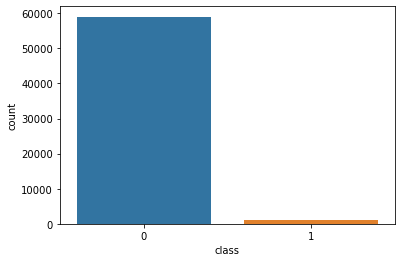

In [14]:
sn.countplot(x= data_train["class"])

In [15]:
#check the value counts of each column and look for any weirdness
target(data_train)

----------------------------------
class
----------------------------------
   total  percentage
0  59000   98.333333
1   1000    1.666667




# Test Dataset

In [16]:
data_test['class'] = data_test['class'].apply(lambda x: 0 if x == 'neg' else 1)
data_test["class"].value_counts()# Distribution of class labels

0    15625
1      375
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

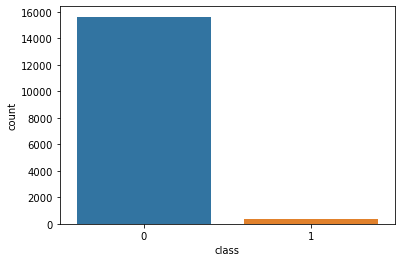

In [17]:
sn.countplot(x= data_test["class"])

In [18]:
#check the value counts of each column and look for any weirdness
target(data_test)

----------------------------------
class
----------------------------------
   total  percentage
0  15625    97.65625
1    375     2.34375




# Observations

From the above Observations, the given dataset is highly imbalanced both train and test. Negative class dominates over the positive class.

# Handling Missing values

In [19]:
data_train.describe(include='all')

class        aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000  \
count   60000.000000  6.000000e+04  60000  60000  60000  60000  60000  60000   
unique           NaN           NaN     30   2062   1887    334    419    155   
top              NaN           NaN     na      0     na      0      0      0   
freq             NaN           NaN  46329   8752  14861  55543  55476  59133   
mean        0.016667  5.933650e+04    NaN    NaN    NaN    NaN    NaN    NaN   
std         0.128020  1.454301e+05    NaN    NaN    NaN    NaN    NaN    NaN   
min         0.000000  0.000000e+00    NaN    NaN    NaN    NaN    NaN    NaN   
25%         0.000000  8.340000e+02    NaN    NaN    NaN    NaN    NaN    NaN   
50%         0.000000  3.077600e+04    NaN    NaN    NaN    NaN    NaN    NaN   
75%         0.000000  4.866800e+04    NaN    NaN    NaN    NaN    NaN    NaN   
max         1.000000  2.746564e+06    NaN    NaN    NaN    NaN    NaN    NaN   

       ag_001 ag_002 ag_003 ag_004 ag_005 ag_006 ag_007 ag_008 ag_009 ah_000  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique    618   2423   7880  23072  40798  40616  32126  18933   5356  43572   
top         0      0      0      0      0      0      0      0      0     na   
freq    58587  56181  46894   1305   1941   1238  15875  25091  40698    645   
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ai_000 aj_000 ak_000 al_000   am_0 an_000 ao_000 ap_000 aq_000 ar_000  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique   4056    895    160   9018  10583  48205  47724  44673  34922     69   
top         0      0      0      0      0     na     na     na     na      0   
freq    53588  46919  55227  37473  37295    642    589    642    589  54928   
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique     22   3512     57   3861   2216    467    920    987   1033   1768   
top         0      0      0      0      0      0      0      0      0      0   
freq    59350  53395  59310  10008  10191  58761  58192  58162  58078  57158   
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ay_005 ay_006 ay_007 ay_008 ay_009 az_000 az_001 az_002 az_003 az_004  \
count   60000  60000  60000  60000  60000  60000  60000  60000  60000  60000   
unique  196

In [20]:
data_test.describe(include='all')

class        aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000  \
count   16000.000000  1.600000e+04  16000  16000  16000  16000  16000  16000   
unique           NaN           NaN     19   1312   1203    171    202     60   
top              NaN           NaN     na      0     na      0      0      0   
freq             NaN           NaN  12363   2289   3981  14764  14741  15749   
mean        0.023438  6.799698e+04    NaN    NaN    NaN    NaN    NaN    NaN   
std         0.151293  5.035350e+05    NaN    NaN    NaN    NaN    NaN    NaN   
min         0.000000  0.000000e+00    NaN    NaN    NaN    NaN    NaN    NaN   
25%         0.000000  9.280000e+02    NaN    NaN    NaN    NaN    NaN    NaN   
50%         0.000000  3.098200e+04    NaN    NaN    NaN    NaN    NaN    NaN   
75%         0.000000  4.947900e+04    NaN    NaN    NaN    NaN    NaN    NaN   
max         1.000000  4.294967e+07    NaN    NaN    NaN    NaN    NaN    NaN   

       ag_001 ag_002 ag_003 ag_004 ag_005 ag_006 ag_007 ag_008 ag_009 ah_000  \
count   16000  16000  16000  16000  16000  16000  16000  16000  16000  16000   
unique    222    801   2836   8648  13579  13401  10397   7336   2671  14140   
top         0      0      0      0      0      0      0      0      0     na   
freq    15575  14954  12442    340    499    326   4139   6684  10797    175   
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ai_000 aj_000 ak_000 al_000   am_0 an_000 ao_000 ap_000 aq_000 ar_000  \
count   16000  16000  16000  16000  16000  16000  16000  16000  16000  16000   
unique   1458    461     60   3810   4358  14863  14817  14475  12446     42   
top         0      0      0      0      0     na     na     na     na      0   
freq    14200  12476  14698   9915   9857    169    162    169    162  14577   
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
count   16000  16000  16000  16000  16000  16000  16000  16000  16000  16000   
unique     11   1369     20   2230   1288    154    288    296    311    550   
top         0      0      0      0      0      0      0      0      0      0   
freq    15828  14168  15819   2656   2720  15647  15502  15499  15484  15225   
mean      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
std       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
min       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
50%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
75%       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
max       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ay_005 ay_006 ay_007 ay_008 ay_009 az_000 az_001 az_002 az_003 az_004  \
count   16000  16000  16000  16000  16000  16000  16000  16000  16000  16000   
unique   68

# Observations

Both the Train and Test dataset has lot of Null values.

In [21]:
# Replacing the na and nan values with np.NaN
data_train.replace(to_replace='nan', value = np.NaN,inplace = True)
data_train.replace(to_replace = 'na', value = np.NaN, inplace = True)
data_test.replace(to_replace='nan', value = np.NaN,inplace = True)
data_test.replace(to_replace = 'na', value = np.NaN, inplace = True)

In [22]:
printinfo(data_train)

data_type  null_count  unique_count  duplicate_count
class      int64           0             2                0
aa_000     int64           0         22095                0
ab_000    object       46329            29                0
ac_000    object        3335          2061                0
ad_000    object       14861          1886                0
ae_000    object        2500           333                0
af_000    object        2500           418                0
ag_000    object         671           154                0
ag_001    object         671           617                0
ag_002    object         671          2422                0
ag_003    object         671          7879                0
ag_004    object         671         23071                0
ag_005    object         671         40797                0
ag_006    object         671         40615                0
ag_007    object         671         32125                0
ag_008    object         671         18932                0
ag_009    object         671          5355                0
ah_000    object         645         43571                0
ai_000    object         629          4055                0
aj_000    object         629           894                0
ak_000    object        4400           159                0
al_000    object         642          9017                0
am_0      object         629         10582                0
an_000    object         642         48204                0
ao_000    object         589         47723                0
ap_000    object         642         44672                0
aq_000    object         589         34921                0
ar_000    object        2723            68                0
as_000    object         629            21                0
at_000    object         629          3511                0
au_000    object         629            56                0
av_000    object        2500          3860                0
ax_000    object        2501          2215                0
ay_000    object         671           466                0
ay_001    object         671           919                0
ay_002    object         671           986                0
ay_003    object         671          1032                0
ay_004    object         671          1767                0
ay_005    object         671         19696                0
ay_006    object         671         34628                0
ay_007    object         671         38651                0
ay_008    object         671         37822                0
ay_009    object         671           447                0
az_000    object         671          9184                0
az_001    object         671          7378                0
az_002    object         671          9064                0
az_003    object         671         21530                0
az_004    object         671         34077                0
az_005    object         671         44601                0
az_006    object         671         12306                0
az_007    object         671          3876                0
az_008    object         671          1271                0
az_009    object         671           336                0
ba_000    object         688         44840                0
ba_001    object         688         40164                0
ba_002    object         688         35958                0
ba_003    object         688         32914                0
ba_004    object         688         30673                0
ba_005    object         688         29593                0
ba_006    object         688         29281                0
ba_007    object         688         25166                0
ba_008    object         688         11816                0
ba_009    object         688          6797                0
bb_000    object         645         49392                0
bc_000    object        2725          2807                0
bd_000    object        2727          3565     

# Train dataset

In [23]:
total_num_data = len(data_train.index)
missing_data_count = data_train.isnull().sum().sort_values(ascending=False)
missing_data_percent = data_train.isnull().sum().sort_values(ascending=False)/total_num_data
missing_data = pd.concat([missing_data_count, round(missing_data_percent*100,2)],keys = ['total','percentage'],axis = 1)
missing_data

total  percentage
br_000  49264       82.11
bq_000  48722       81.20
bp_000  47740       79.57
bo_000  46333       77.22
ab_000  46329       77.22
cr_000  46329       77.22
bn_000  44009       73.35
bm_000  39549       65.92
bl_000  27277       45.46
bk_000  23034       38.39
ch_000  14861       24.77
co_000  14861       24.77
cg_000  14861       24.77
cf_000  14861       24.77
ad_000  14861       24.77
ct_000  13808       23.01
cu_000  13808       23.01
cv_000  13808       23.01
cx_000  13808       23.01
cy_000  13808       23.01
cz_000  13808       23.01
da_000  13808       23.01
db_000  13808       23.01
dc_000  13808       23.01
ec_00   10239       17.07
cm_000   9877       16.46
ed_000   9553       15.92
cl_000   9553       15.92
ak_000   4400        7.33
ca_000   4356        7.26
dm_000   4009        6.68
dh_000   4008        6.68
dg_000   4008        6.68
df_000   4008        6.68
dl_000   4008        6.68
eb_000   4007        6.68
dk_000   4007        6.68
dj_000   4007        6.68
di_000   4006        6.68
ac_000   3335        5.56
bx_000   3257        5.43
cc_000   3255        5.42
ds_000   2727        4.54
bd_000   2727        4.54
dt_000   2727        4.54
dr_000   2726        4.54
dq_000   2726        4.54
du_000   2726        4.54
dv_000   2726        4.54
dp_000   2726        4.54
bc_000   2725        4.54
cp_000   2724        4.54
do_000   2724        4.54
dy_000   2724        4.54
ef_000   2724        4.54
de_000   2724        4.54
bz_000   2723        4.54
dx_000   2723        4.54
eg_000   2723        4.54
ea_000   2723        4.54
ar_000   2723        4.54
dz_000   2723        4.54
dd_000   2503        4.17
be_000   2503        4.17
ce_000   2502        4.17
ax_000   2501        4.17
bf_000   2500        4.17
av_000   2500        4.17
af_000   2500        4.17
ae_000   2500        4.17
bs_000    726        1.21
cb_000    726        1.21
cq_000    691        1.15
dn_000    691        1.15
bv_000    691        1.15
bu_000    691        1.15
ba_003    688        1.15
ba_008    688        1.15
ba_002    688        1.15
ba_004    688        1.15
ba_005    688        1.15
ba_006    688        1.15
ba_000    688        1.15
ba_007    688        1.15
ba_009    688        1.15
ba_001    688        1.15
cn_005    687        1.14
cn_007    687        1.14
cn_004    687        1.14
cn_000    687        1.14
cn_008    687        1.14
cn_009    687        1.14
cn_001    687        1.14
cn_006    687        1.14
cn_003    687        1.14
cn_002    687        1.14
cd_000    676        1.13
ag_008    671        1.12
az_002    671        1.12
ag_007    671        1.12
ag_006    671        1.12
ag_005    671        1.12
ag_004    671        1.12
ay_008    671        1.12
az_001    671        1.12
az_000    671        1.12
ay_009    671        1.12
ag_002    671        1.12
ay_007    671        1.12
ay_006    671        1.12
ay_005    671        1.12
ay_004    671        1.12
ay_003    671        1.12
ay_002    671        1.12
ay_001    671        1.12
ag_003    671        1.12
ee_004    671        1.12
ag_001    671        1.12
ag_000    671        1.12
ee_003    671        1.12
ee_002    671        1.12
ee_001    671        1.12
ee_005    671        1.12
ee_009    671        1.12
az_009    671        1.12
ee_008    671        1.12
ee_007    671        1.12
ee_006    671        1.12
az_008    671        1.12
az_007    671        1.12
ag_009    671        1.12
az_006    671        1.12
az_005    671        1.12
az_004    671        1.12
az_003    671        1.12
ee_000    671        1.12
ay_000    671        1.12
cs_006    669        1.12
cs_008    669        1.12
cs_005    669        1.12
cs_000    669        1.12
cs_001    669        1.12
cs_002    669        1.12
cs_009    669        1.12
cs_003    669        1.12
cs_007    669        1.12
cs_004    669        1.12
bb_000    645        1.08
ah_000    645        1.08
bh_000    642        1.07
ap_000    642        1.07
bg_000    642        1.07
an_000    642        1.07
al_0

In [24]:
import plotly.express as px
fig = px.bar(missing_data)
fig.show()

# Test dataset

In [25]:
total_num_data = len(data_test.index)
missing_data_count = data_test.isnull().sum().sort_values(ascending=False)
missing_data_percent = data_test.isnull().sum().sort_values(ascending=False)/total_num_data
missing_data = pd.concat([missing_data_count, round(missing_data_percent*100,2)],keys = ['total','percentage'],axis = 1)
missing_data

total  percentage
br_000  13129       82.06
bq_000  12981       81.13
bp_000  12721       79.51
bo_000  12376       77.35
ab_000  12363       77.27
cr_000  12363       77.27
bn_000  11713       73.21
bm_000  10546       65.91
bl_000   7226       45.16
bk_000   6094       38.09
cf_000   3981       24.88
cg_000   3981       24.88
ch_000   3981       24.88
ad_000   3981       24.88
co_000   3981       24.88
cv_000   3718       23.24
cz_000   3718       23.24
cy_000   3718       23.24
da_000   3718       23.24
cx_000   3718       23.24
ct_000   3718       23.24
cu_000   3718       23.24
dc_000   3718       23.24
db_000   3718       23.24
ec_00    2644       16.53
cm_000   2578       16.11
cl_000   2459       15.37
ed_000   2459       15.37
ca_000   1206        7.54
ak_000   1198        7.49
dh_000   1094        6.84
dm_000   1094        6.84
eb_000   1094        6.84
dg_000   1094        6.84
df_000   1094        6.84
di_000   1094        6.84
dj_000   1094        6.84
dk_000   1094        6.84
dl_000   1094        6.84
ac_000    926        5.79
bx_000    866        5.41
cc_000    865        5.41
dv_000    764        4.78
bd_000    764        4.78
dy_000    764        4.78
dx_000    764        4.78
ar_000    764        4.78
ds_000    764        4.78
du_000    764        4.78
dt_000    764        4.78
dr_000    764        4.78
dq_000    764        4.78
dp_000    764        4.78
do_000    764        4.78
de_000    764        4.78
bc_000    764        4.78
bz_000    763        4.77
cp_000    763        4.77
ef_000    762        4.76
ea_000    762        4.76
dz_000    762        4.76
eg_000    762        4.76
af_000    690        4.31
ae_000    690        4.31
be_000    690        4.31
bf_000    689        4.31
ax_000    688        4.30
av_000    688        4.30
dd_000    688        4.30
ce_000    688        4.30
bs_000    202        1.26
cb_000    202        1.26
cn_009    194        1.21
cn_008    194        1.21
cn_001    194        1.21
cn_003    194        1.21
cn_000    194        1.21
cn_002    194        1.21
cn_004    194        1.21
cn_005    194        1.21
cn_006    194        1.21
cn_007    194        1.21
ba_008    193        1.21
ba_009    193        1.21
ba_000    193        1.21
ba_001    193        1.21
ba_002    193        1.21
ba_003    193        1.21
ba_004    193        1.21
ba_005    193        1.21
ba_006    193        1.21
ba_007    193        1.21
ee_001    192        1.20
ee_006    192        1.20
ee_000    192        1.20
ee_003    192        1.20
ee_002    192        1.20
ee_004    192        1.20
ee_007    192        1.20
ay_007    192        1.20
az_003    192        1.20
az_002    192        1.20
az_001    192        1.20
az_000    192        1.20
ay_009    192        1.20
ee_008    192        1.20
ay_006    192        1.20
az_005    192        1.20
ay_005    192        1.20
ay_004    192        1.20
ay_003    192        1.20
ay_002    192        1.20
ay_001    192        1.20
ay_000    192        1.20
az_004    192        1.20
ay_008    192        1.20
az_006    192        1.20
az_007    192        1.20
ee_009    192        1.20
az_009    192        1.20
az_008    192        1.20
ee_005    192        1.20
bv_000    190        1.19
cq_000    190        1.19
dn_000    190        1.19
bu_000    190        1.19
ag_004    189        1.18
ag_005    189        1.18
ag_006    189        1.18
ag_007    189        1.18
ag_003    189        1.18
ag_002    189        1.18
ag_001    189        1.18
ag_008    189        1.18
ag_009    189        1.18
cs_003    189        1.18
ag_000    189        1.18
cs_002    189        1.18
cs_008    189        1.18
cs_009    189        1.18
cs_004    189        1.18
cs_005    189        1.18
cs_006    189        1.18
cs_007    189        1.18
cs_000    189        1.18
cs_001    189        1.18
cd_000    185        1.16
ah_000    175        1.09
bb_000    175        1.09
al_000    169        1.06
an_000    169        1.06
ap_000    169        1.06
bh_000    169        1.06
bg_0

In [26]:
import plotly.express as px
fig = px.bar(missing_data)
fig.show()

# Feature Scaling

# Fill missing data in training and test data-set Imputing the NA values in our data with the median value to get the central tendency or behaviour of trucks.

In [27]:
uncleaned_train_cols= [x for x in data_train.columns if data_train[x].isnull().sum()>0]
uncleaned_test_cols= [x for x in data_test.columns if data_test[x].isnull().sum()>0]

In [28]:
# Imputer object using the median strategy and
# missing_values type for imputation

In [29]:
imp = SimpleImputer(missing_values = np.nan,strategy='median')
for col in uncleaned_train_cols:
    data_train[col] = imp.fit_transform(data_train[col].values.reshape(-1, 1) )

In [30]:
imp = SimpleImputer(missing_values = np.nan,strategy='median')
for col in uncleaned_test_cols:
    data_test[col] = imp.fit_transform(data_test[col].values.reshape(-1, 1) )

# Extract features and labels from the training and test data-set

In [31]:
X_train = data_train.drop('class', axis=1)
y_train = data_train.loc[:, 'class']
X_test = data_test.drop('class', axis=1)
y_test = data_test.loc[:, 'class']

In [32]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')